## Atmospheric corrected spectrums for march, all areas HYPSO-1Captures


#### Fungerer, sjekker opp med indirekt georeferencing, siden den som er ikke er korrekt Se bilder der hvor områdene er plottet

### Uploading the data

In [57]:
from hypso import Hypso1, Hypso2
import os 
import sys
import matplotlib.pyplot as plt
from global_land_mask import globe 
import numpy as np 

parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import funcions_autonom as f
import atmosperic_correction as atm_c ## obs denne het før ac -> kan føre til feil dersom man ikke finner funkjsons navn
import base as ac

import xarray as xr
import re
import math
import importlib

from sklearn.cluster import KMeans
from collections import defaultdict

from sklearn.preprocessing import StandardScaler

np.random.seed(42)

dir_path = ".." ## filene hentes fra en mappe over der vi er nå

In [58]:
frohavet_path_0316 = os.path.join(dir_path, "frohavet_2023-03-16T10-44-08Z-l1a.nc")
frohavet_path_0316_b = os.path.join(dir_path, "frohavet_2023-03-16T10-44-08Z-l1b.nc")
frohavet_path_0316_c = os.path.join(dir_path, "frohavet_2023-03-16T10-44-08Z-l1c.nc")
frohavet_path_0316_d = os.path.join(dir_path, "frohavet_2023-03-16T10-44-08Z-l1d.nc")

satobj_h1 = Hypso1( path = frohavet_path_0316, verbose = True )

l1a_cube = satobj_h1.l1a_cube
l1b_cube = Hypso1( path = frohavet_path_0316_b, verbose = True )
l1c_cube = Hypso1( path = frohavet_path_0316_c, verbose = True )
l1d_cube = Hypso1( path = frohavet_path_0316_d, verbose = True )

l1c_cube = l1c_cube.l1c_cube
l1b_cube = l1b_cube.l1b_cube
l1d_cube = l1d_cube.l1d_cube

satobj_h1.run_direct_georeferencing() # in order to get the longiyudes and latitudes

[INFO] Loading L1a capture frohavet_2023-03-16T10-44-08Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1b capture frohavet_2023-03-16T10-44-08Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1c capture frohavet_2023-03-16T10-44-08Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1d capture frohavet_2023-03-16T10-44-08Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 1837
[INFO] ADCS time range: 1678962780.000000 to 1678963680.000000
[INFO] Frame time range: 1678963448.503009 to 1678963491.912100
[INFO] 173 sample(s) inside frame time range
[INFO] Interpolating 956 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometr

In [59]:
frohavet_path_0328 = os.path.join(dir_path, "frohavet_2023-03-28T10-59-21Z-l1a.nc")
frohavet_path_0328_b = os.path.join(dir_path, "frohavet_2023-03-28T10-59-21Z-l1b.nc")
frohavet_path_0328_c = os.path.join(dir_path, "frohavet_2023-03-28T10-59-21Z-l1c.nc")
frohavet_path_0328_d = os.path.join(dir_path, "frohavet_2023-03-28T10-59-21Z-l1d.nc")

satobj_h1_0328 = Hypso1( path = frohavet_path_0328, verbose = True )

l1a_cube_0328 = satobj_h1_0328.l1a_cube
l1b_cube_0328 = Hypso1( path = frohavet_path_0328_b, verbose = True )
l1c_cube_0328 = Hypso1( path = frohavet_path_0328_c, verbose = True )
l1d_cube_0328 = Hypso1( path = frohavet_path_0328_d, verbose = True )

l1c_cube_0328 = l1c_cube_0328.l1c_cube
l1b_cube_0328 = l1b_cube_0328.l1b_cube
l1d_cube_0328 = l1d_cube_0328.l1d_cube

satobj_h1_0328.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture frohavet_2023-03-28T10-59-21Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1b capture frohavet_2023-03-28T10-59-21Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1c capture frohavet_2023-03-28T10-59-21Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1d capture frohavet_2023-03-28T10-59-21Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 1837
[INFO] ADCS time range: 1680000480.000000 to 1680001440.000000
[INFO] Frame time range: 1680001161.388534 to 1680001204.797625
[INFO] 174 sample(s) inside frame time range
[INFO] Interpolating 956 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometr

In [60]:
frohavet_path_0329 = os.path.join(dir_path, "frohavet_2023-03-29T10-44-51Z-l1a.nc")
frohavet_path_0329_b = os.path.join(dir_path, "frohavet_2023-03-29T10-44-51Z-l1b.nc")
frohavet_path_0329_c = os.path.join(dir_path, "frohavet_2023-03-29T10-44-51Z-l1c.nc")
frohavet_path_0329_d = os.path.join(dir_path, "frohavet_2023-03-29T10-44-51Z-l1d.nc")

satobj_h1_0329 = Hypso1( path = frohavet_path_0329, verbose = True )

l1a_cube_0329 = satobj_h1_0329.l1a_cube
l1b_cube_0329 = Hypso1( path = frohavet_path_0329_b, verbose = True )
l1c_cube_0329 = Hypso1( path = frohavet_path_0329_c, verbose = True )
l1d_cube_0329 = Hypso1( path = frohavet_path_0329_d, verbose = True )

l1c_cube_0329 = l1c_cube_0329.l1c_cube
l1b_cube_0329 = l1b_cube_0329.l1b_cube
l1d_cube_0329 = l1d_cube_0329.l1d_cube

satobj_h1_0329.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture frohavet_2023-03-29T10-44-51Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1b capture frohavet_2023-03-29T10-44-51Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1c capture frohavet_2023-03-29T10-44-51Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1d capture frohavet_2023-03-29T10-44-51Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 1678
[INFO] ADCS time range: 1680086040.000000 to 1680086915.000000
[INFO] Frame time range: 1680086691.474726 to 1680086734.883817
[INFO] 174 sample(s) inside frame time range
[INFO] Interpolating 956 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometr

In [61]:
fro_230330 = os.path.join(dir_path, "frohavet_2023-03-30T10-30-26Z-l1a.nc")
fro_230330_b = os.path.join(dir_path, "frohavet_2023-03-30T10-30-26Z-l1b.nc")
fro_230330_c = os.path.join(dir_path, "frohavet_2023-03-30T10-30-26Z-l1c.nc")
fro_230330_d = os.path.join(dir_path, "frohavet_2023-03-30T10-30-26Z-l1d.nc")

satobj_h1_230330 = Hypso1( path = fro_230330, verbose = True )

l1a_cube_230330 = satobj_h1_230330.l1a_cube
l1b_cube_230330 = Hypso1( path = fro_230330_b, verbose = True )
l1c_cube_230330 = Hypso1( path = fro_230330_c, verbose = True )
l1d_cube_230330 = Hypso1( path = fro_230330_d, verbose = True )

l1c_cube_230330 = l1c_cube_230330.l1c_cube
l1b_cube_230330 = l1b_cube_230330.l1b_cube
l1d_cube_230330 = l1d_cube_230330.l1d_cube

satobj_h1_230330.run_direct_georeferencing() # in order to get the longiyudes and latitudes

[INFO] Loading L1a capture frohavet_2023-03-30T10-30-26Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture frohavet_2023-03-30T10-30-26Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture frohavet_2023-03-30T10-30-26Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture frohavet_2023-03-30T10-30-26Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 1921
[INFO] ADCS time range: 1680171540.000000 to 1680172458.250000
[INFO] Frame time range: 1680172226.731407 to 1680172276.481407
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry comput

In [62]:
h1_230329_points = os.path.join(dir_path, "2023-03-29-sift-bin.points")
h1_230330_points = os.path.join(dir_path, "2023-03-30-sift-bin.points")

#satobj_h1_0329.run_indirect_georeferencing(points_file_path= h1_230329_points, flip=True)
satobj_h1_230330.run_indirect_georeferencing(points_file_path= h1_230330_points, flip=True)



[INFO] Running indirect georeferencing...
[INFO] No image mode provided. Detected image mode: bin3
[INFO] Does check_star_tracker_orientation() indicate image flip?
False
[INFO] Running track geometry computations...
[INFO] Using UTM map: WGS 84 / UTM zone 32N EPSG: 32632
[INFO] Track geometry computations done.
[INFO] Running angles geometry computations...
[INFO] Computing local angles (sun and satellite azimuth and zenith angles) ...
[INFO] Using astropy on a subsampling of pixels ... (TODO skyfield may be faster)
[INFO] Interpolating the rest of the pixels ...
[INFO] Computing local angles done
[INFO] Angles geometry computations done.


### Defining areas

In [63]:
#extract wanted waelengths
wl = satobj_h1_230330.wavelengths[4:118]
x_123 = [387.84749685, 391.40406599, 394.95941579, 398.51354623, 402.06645732, 405.61814905, 409.16862143, 412.71787446, 416.26590814, 419.81272246, 423.35831743, 426.90269305, 430.44584931, 433.98778622, 437.52850378, 441.06800198, 444.60628083, 448.14334033, 451.67918047, 455.21380126, 458.7472027, 462.27938479, 465.81034752, 469.3400909 , 472.86861492,476.3959196 , 479.92200491, 483.44687088, 486.97051749, 490.49294475,494.01415266, 497.53414122, 501.05291042, 504.57046026, 508.08679076,511.6019019 , 515.11579369, 518.62846612, 522.13991921, 525.65015294,529.15916731, 532.66696233, 536.173538  , 539.67889432, 543.18303128,546.68594889, 550.18764715, 553.68812606, 557.18738561, 560.68542581,564.18224665, 567.67784814, 571.17223028, 574.66539307, 578.1573365, 581.64806058, 585.1375653 , 588.62585068, 592.1129167 , 595.59876336,599.08339068, 602.56679864, 606.04898725, 609.5299565 , 613.0097064 ,616.48823695, 619.96554815, 623.44163999, 626.91651248, 630.39016561,633.86259939, 637.33381382, 640.8038089 , 644.27258462, 647.74014099,651.20647801, 654.67159568, 658.13549399, 661.59817294, 665.05963255,668.5198728 , 671.9788937 , 675.43669524, 678.89327744, 682.34864028,685.80278376, 689.25570789, 692.70741267, 696.1578981 , 699.60716418,703.0552109 , 706.50203826, 709.94764628, 713.39203494, 716.83520425,720.2771542 , 723.7178848 , 727.15739605, 730.59568795, 734.03276049,737.46861368, 740.90324752, 744.336662  , 747.76885713, 751.19983291,754.62958933, 758.0581264 , 761.48544412, 764.91154248, 768.33642149,771.76008115, 775.18252146, 778.60374241, 782.02374401, 785.44252625,788.86008915, 792.27643269, 795.69155687, 799.10546171, 802.51814719]
wl = x_123[4:118]

target_lat_6 = [64.48557437461893,64.52896641587218, 64.20992561747796, 64.22009411667561] #område 7
target_lon_6 = [9.886201113342556, 8.708294855080245,9.704720121565003,8.73032214102829]  

target_lat_5 = [64.17324887890479,64.11631446557637, 63.896904083590066, 63.887923483169004] #område 6.1
target_lon_5 = [9.582148298814932,8.924448409066027, 9.578289180688513, 8.96230357578283]

target_lat_3 = [63.818490304354434,63.793837321385155, 63.65192496143867, 63.660555970548074] #område 2.1.
target_lon_3 = [9.531415429238418, 9.442656298818237,9.526455044589706,9.439764451470932]

target_lat_2 = [63.646767083517425,63.61771951990031, 63.47865598622861, 63.42721372576498] #område 5.1
target_lon_2 = [9.804697410334523, 9.723689711502818,10.061035990832918,9.982929114384596]  

target_lat_1 = [63.52676744792975, 63.55113867486421, 63.44802428401152, 63.46332195091103] #område 8 
target_lon_1 = [10.726421572030368, 10.227932960954064, 10.706024496195505, 10.211631333282082] 

ideal_lat =  63.818490304354434#43.558889
ideal_lon = 9.531415429238418  #4.864167

importlib.reload(ac)
importlib.reload(f)

<module 'funcions_autonom' from '/home/itk/Documents/AnneMarthe/Master/Hypos_analyse/funcions_autonom.py'>

### Atmospheric corrected data cubes, denne tar tid å kjøre på nytt. Trengs ikke så ofte

In [64]:
cube_0316 = np.array(l1d_cube[:,:, 4:118]) # get the toa reflectance cube
sat = np.max(l1a_cube, axis = -1) > 35000 ##identifying saturated pixsels
T, S, objs = ac.atm_correction(cube_0316.reshape(-1,114), solar=np.ones(114), verbose = True, tol = 0.01, est_min_R = 0.05) # calculating transmission and scattering

cube_norm_0316 = (cube_0316 - S) /T
cube_norm_0316[sat] = np.nan #normalizing the cube and setting saturated pixels to nan

0.1301401816368606
0.04033158572291059


KeyboardInterrupt: 

In [ ]:
cube_0328 = np.array(l1d_cube_0328[:,:, 4:118]) # get the toa reflectance cube
sat = np.max(l1a_cube_0328, axis = -1) > 35000 ##identifying saturated pixsels
T, S, objs = ac.atm_correction(cube_0328.reshape(-1,114), solar=np.ones(114), verbose = True, tol = 0.01, est_min_R = 0.05) # calculating transmission and scattering

cube_norm_0328 = (cube_0328 - S) /T
cube_norm_0328[sat] = np.nan #normalizing the cube and setting saturated pixels to nan

0.0072687712303497
0.0023336148293508266
0.0012809577941815683
0.0009450474458930948
0.0007919202743752482
0.0007168868302497517
0.0006784479805528784
0.000658309420355427
0.0006464645123131045
0.000639303298042594
0.0006346317471921651


In [ ]:
cube_0329 = np.array(l1d_cube_0329[:,:, 4:118]) # get the toa reflectance cube
sat = np.max(l1a_cube_0329, axis = -1) > 35000 ##identifying saturated pixsels
T, S, objs = ac.atm_correction(cube_0329.reshape(-1,114), solar=np.ones(114), verbose = True, tol = 0.01, est_min_R = 0.05) # calculating transmission and scattering

cube_norm_0329 = (cube_0329 - S) /T
cube_norm_0329[sat] = np.nan #normalizing the cube and setting saturated pixels to nan

0.0038781326811564987
0.0013346422662408501
0.0007336935341614267
0.0005544286898249861
0.000475959260024501
0.0004390181586600214
0.00042171704807263035
0.00041275304322712714
0.00040734874093377503
0.0004038078793395568


In [ ]:
cube_0330 = np.array(l1d_cube_230330[:,:, 4:118]) # get the toa reflectance cube
sat = np.max(l1a_cube_230330, axis = -1) > 35000 ##identifying saturated pixsels
T, S, objs = ac.atm_correction(cube_0330.reshape(-1,114), solar=np.ones(114), verbose = True, tol = 0.01, est_min_R = 0.05) # calculating transmission and scattering

cube_norm_0330 = (cube_0330 - S) /T
cube_norm_0330[sat] = np.nan #normalizing the cube and setting saturated pixels to nan

0.0035676612324148167
0.001245527125829396
0.0006724815614877414
0.0005202119703314721
0.00045535308963129975
0.0004240978869840134
0.00040827547054184295
0.0003999482628148956
0.00039519252738591325
0.00039218518750474787


 ### RSS ATM corrected


#### RRS forhavet 0316

In [ ]:
latitudes_0316 = satobj_h1.latitudes
longitudes_0316 = satobj_h1.longitudes

print(latitudes_0316[1][1])

piksel_row_A1_0316, piksel_col_A1_0316 = f.latLong_to_piksel(target_lat_1, target_lon_1, latitudes_0316, longitudes_0316) #####________
print(piksel_row_A1_0316, piksel_col_A1_0316) 

rss_A1_0316 = f.hyps1_rss_matrix(cube_norm_0316, piksel_row_A1_0316, piksel_col_A1_0316, satobj_h1)    #####________
print(rss_A1_0316.shape) 

median_A1_0316_atmc = np.median(rss_A1_0316, axis = 0)
median_A1_0316_atmc.shape
normaized_spectrum_median_A1_0316 = f.min_max_nomralization(median_A1_0316_atmc)
l2_norm_A1_0316 = np.linalg.norm(median_A1_0316_atmc)  
l2_normalized_spectrum_A1_0316 = median_A1_0316_atmc / l2_norm_A1_0316  

65.08475654319237
[np.int64(317), np.int64(489), np.int64(324), np.int64(495)] [np.int64(0), np.int64(0), np.int64(0), np.int64(0)]
Pixel number:  0
(0,)


/home/itk/anaconda3/envs/hypso-env/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/itk/anaconda3/envs/hypso-env/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
piksel_row_A2_0316, piksel_col_A2_0316 = f.latLong_to_piksel(target_lat_2, target_lon_2, latitudes_0316, longitudes_0316) #####________
print(piksel_row_A2_0316, piksel_col_A2_0316) 

rss_A2_0316 = f.hyps1_rss_matrix(cube_norm_0316, piksel_row_A2_0316, piksel_col_A2_0316, satobj_h1)    #####________
print(rss_A2_0316.shape) 

median_A2_0316_atmc = np.median(rss_A2_0316, axis = 0)
median_A2_0316_atmc.shape
normaized_spectrum_median_A1_0316 = f.min_max_nomralization(median_A2_0316_atmc)
l2_norm_A2_0316 = np.linalg.norm(median_A2_0316_atmc)  
l2_normalized_spectrum_A2_0316 = median_A2_0316_atmc / l2_norm_A2_0316  

[np.int64(568), np.int64(582), np.int64(548), np.int64(576)] [np.int64(115), np.int64(139), np.int64(0), np.int64(0)]
Pixel number:  185
(185, 114)


In [ ]:
piksel_row_A3_0316, piksel_col_A3_0316 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitudes_0316, longitudes_0316) #####________
print(piksel_row_A3_0316, piksel_col_A3_0316) 

rss_A3_0316 = f.hyps1_rss_matrix(cube_norm_0316, piksel_row_A3_0316, piksel_col_A3_0316, satobj_h1)    #####________
print(rss_A3_0316.shape) 

median_A3_0316_atmc = np.median(rss_A3_0316, axis = 0)
median_A3_0316_atmc.shape
normaized_spectrum_median_A1_0316 = f.min_max_nomralization(median_A3_0316_atmc)
l2_norm_A3_0316 = np.linalg.norm(median_A3_0316_atmc)  
l2_normalized_spectrum_A3_0316 = median_A3_0316_atmc / l2_norm_A3_0316  

[np.int64(530), np.int64(544), np.int64(583), np.int64(586)] [np.int64(339), np.int64(369), np.int64(253), np.int64(300)]
Pixel number:  607
(607, 114)


In [ ]:
piksel_row_A5_0316, piksel_col_A5_0316 = f.latLong_to_piksel(target_lat_5, target_lon_5, latitudes_0316, longitudes_0316) #####________
print(piksel_row_A5_0316, piksel_col_A5_0316) 

rss_A5_0316 = f.hyps1_rss_matrix(cube_norm_0316, piksel_row_A5_0316, piksel_col_A5_0316, satobj_h1)    #####________
print(rss_A5_0316.shape) 

median_A5_0316_atmc = np.median(rss_A5_0316, axis = 0)
median_A5_0316_atmc.shape
normaized_spectrum_median_A1_0316 = f.min_max_nomralization(median_A5_0316_atmc)
l2_norm_A5_0316 = np.linalg.norm(median_A5_0316_atmc)  
l2_normalized_spectrum_A5_0316 = median_A5_0316_atmc / l2_norm_A5_0316  

[np.int64(415), np.int64(547), np.int64(503), np.int64(542)] [np.int64(503), np.int64(683), np.int64(356), np.int64(668)]


Pixel number:  6597
(6597, 114)


In [ ]:
piksel_row_A6_0316, piksel_col_A6_0316 = f.latLong_to_piksel(target_lat_6, target_lon_6, latitudes_0316, longitudes_0316) #####________
print(piksel_row_A6_0316, piksel_col_A6_0316) 

rss_A6_0316 = f.hyps1_rss_matrix(cube_norm_0316, piksel_row_A6_0316, piksel_col_A6_0316, satobj_h1)    #####________
print(rss_A6_0316.shape) 

median_A6_0316_atmc = np.median(rss_A6_0316, axis = 0)
median_A6_0316_atmc.shape
normaized_spectrum_median_A1_0316 = f.min_max_nomralization(median_A6_0316_atmc)
l2_norm_A6_0316 = np.linalg.norm(median_A6_0316_atmc)  
l2_normalized_spectrum_A6_0316 = median_A6_0316_atmc / l2_norm_A6_0316  

[np.int64(298), np.int64(622), np.int64(396), np.int64(617)] [np.int64(520), np.int64(683), np.int64(460), np.int64(683)]
Pixel number:  34996
(34996, 114)


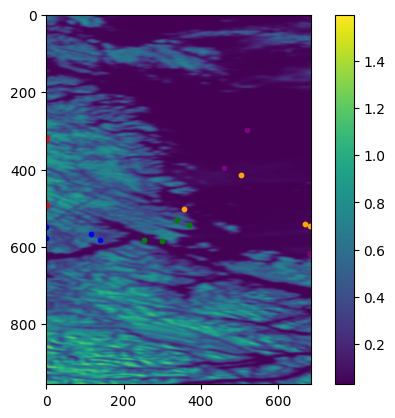

In [ ]:
plt.imshow(cube_0316[:,:,100])
plt.colorbar()

for i in range(4):
    #plt.scatter(start_end_row_col_2[i], start_end_row_piksel_2[i] , color='red', s=10)
    plt.scatter(piksel_col_A1_0316[i], piksel_row_A1_0316[i] , color='red', s=10)
    plt.scatter(piksel_col_A2_0316[i], piksel_row_A2_0316[i] , color='blue', s=10)
    plt.scatter(piksel_col_A3_0316[i], piksel_row_A3_0316[i] , color='green', s=10)
    plt.scatter(piksel_col_A5_0316[i], piksel_row_A5_0316[i] , color='orange', s=10)
    plt.scatter(piksel_col_A6_0316[i], piksel_row_A6_0316[i] , color='purple', s=10)

#### RRS frohavet 0328

In [ ]:
latitudes_0328 = satobj_h1_0328.latitudes
longitudes_0328 = satobj_h1_0328.longitudes

piksel_row_A1_0328, piksel_col_A1_0328 = f.latLong_to_piksel(target_lat_1, target_lon_1, latitudes_0328, longitudes_0328) #####________
print(piksel_row_A1_0328, piksel_col_A1_0328) 

rss_A1_0328 = f.hyps1_rss_matrix(cube_norm_0328, piksel_row_A1_0328, piksel_col_A1_0328, satobj_h1_0328)    #####________
print(rss_A1_0328.shape) 

median_A1_0328_atmc = np.median(rss_A1_0328, axis = 0)
median_A1_0328_atmc.shape
normaized_spectrum_median_A1_0328 = f.min_max_nomralization(median_A1_0328_atmc)
l2_norm_A1_0328 = np.linalg.norm(median_A1_0328_atmc)  
l2_normalized_spectrum_A1_0328 = median_A1_0328_atmc / l2_norm_A1_0328  

[np.int64(437), np.int64(567), np.int64(444), np.int64(595)] [np.int64(0), np.int64(32), np.int64(0), np.int64(3)]
Pixel number:  60
(60, 114)


In [ ]:
piksel_row_A2_0328, piksel_col_A2_0328 = f.latLong_to_piksel(target_lat_2, target_lon_2, latitudes_0328, longitudes_0328) #####________
print(piksel_row_A2_0328, piksel_col_A2_0328) 

rss_A2_0328 = f.hyps1_rss_matrix(cube_norm_0328, piksel_row_A2_0328, piksel_col_A2_0328, satobj_h1_0328)    #####________
print(rss_A2_0328.shape) 

median_A2_0328_atmc = np.median(rss_A2_0328, axis = 0)
median_A2_0328_atmc.shape
normaized_spectrum_median_A2_0328 = f.min_max_nomralization(median_A2_0328_atmc)
l2_norm_A2_0328 = np.linalg.norm(median_A2_0328_atmc)  
l2_normalized_spectrum_A2_0328 = median_A2_0328_atmc / l2_norm_A2_0328  

[np.int64(568), np.int64(582), np.int64(602), np.int64(623)] [np.int64(204), np.int64(219), np.int64(54), np.int64(60)]
Pixel number:  1065
(1065, 114)


In [ ]:
piksel_row_A3_0328, piksel_col_A3_0328 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitudes_0328, longitudes_0328) #####________
print(piksel_row_A3_0328, piksel_col_A3_0328) 

rss_A3_0328 = f.hyps1_rss_matrix(cube_norm_0328, piksel_row_A3_0328, piksel_col_A3_0328, satobj_h1_0328)    #####________
print(rss_A3_0328.shape) 

median_A3_0328_atmc = np.median(rss_A3_0328, axis = 0)
median_A3_0328_atmc.shape
normaized_spectrum_median_A3_0328 = f.min_max_nomralization(median_A3_0328_atmc)
l2_norm_A3_0328 = np.linalg.norm(median_A3_0328_atmc)  
l2_normalized_spectrum_A3_0328 = median_A3_0328_atmc / l2_norm_A3_0328  

[np.int64(534), np.int64(548), np.int64(586), np.int64(589)] [np.int64(364), np.int64(384), np.int64(297), np.int64(330)]
Pixel number:  604
(604, 114)


In [ ]:
piksel_row_A5_0328, piksel_col_A5_0328 = f.latLong_to_piksel(target_lat_5, target_lon_5, latitudes_0328, longitudes_0328) #####________
print(piksel_row_A5_0328, piksel_col_A5_0328) 

rss_A5_0328 = f.hyps1_rss_matrix(cube_norm_0328, piksel_row_A5_0328, piksel_col_A5_0328, satobj_h1_0328)    #####________
print(rss_A5_0328.shape) 

median_A5_0328_atmc = np.median(rss_A5_0328, axis = 0)
median_A5_0328_atmc.shape
normaized_spectrum_median_A5_0328 = f.min_max_nomralization(median_A5_0328_atmc)
l2_norm_A5_0328 = np.linalg.norm(median_A5_0328_atmc)  
l2_normalized_spectrum_A5_0328 = median_A5_0328_atmc / l2_norm_A5_0328  

[np.int64(421), np.int64(501), np.int64(507), np.int64(552)] [np.int64(500), np.int64(683), np.int64(381), np.int64(593)]
Pixel number:  658
(658, 114)


In [ ]:
piksel_row_A6_0328, piksel_col_A6_0328 = f.latLong_to_piksel(target_lat_6, target_lon_6, latitudes_0328, longitudes_0328) #####________
print(piksel_row_A6_0328, piksel_col_A6_0328) 

rss_A6_0328 = f.hyps1_rss_matrix(cube_norm_0328, piksel_row_A6_0328, piksel_col_A6_0328, satobj_h1_0328)    #####________
print(rss_A6_0328.shape) 

median_A6_0328_atmc = np.median(rss_A6_0328, axis = 0)
median_A6_0328_atmc.shape
normaized_spectrum_median_A6_0328 = f.min_max_nomralization(median_A6_0328_atmc)
l2_norm_A6_0328 = np.linalg.norm(median_A6_0328_atmc)  
l2_normalized_spectrum_A6_0328 = median_A6_0328_atmc / l2_norm_A6_0328  

[np.int64(305), np.int64(571), np.int64(401), np.int64(564)] [np.int64(532), np.int64(683), np.int64(474), np.int64(683)]
Pixel number:  24898
(24898, 114)


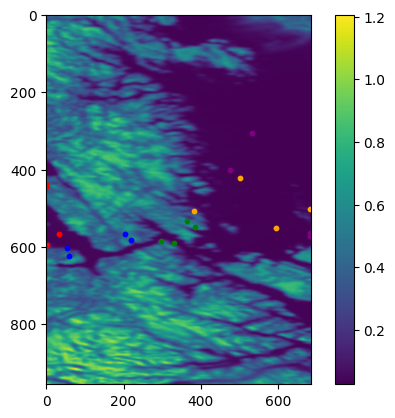

In [ ]:
plt.imshow(cube_0328[:,:,100])
plt.colorbar()

for i in range(4):
    #plt.scatter(start_end_row_col_2[i], start_end_row_piksel_2[i] , color='red', s=10)
    plt.scatter(piksel_col_A1_0328[i], piksel_row_A1_0328[i] , color='red', s=10)
    plt.scatter(piksel_col_A2_0328[i], piksel_row_A2_0328[i] , color='blue', s=10)
    plt.scatter(piksel_col_A3_0328[i], piksel_row_A3_0328[i] , color='green', s=10)
    plt.scatter(piksel_col_A5_0328[i], piksel_row_A5_0328[i] , color='orange', s=10)
    plt.scatter(piksel_col_A6_0328[i], piksel_row_A6_0328[i] , color='purple', s=10)

#### RRS frohavet 0329

In [ ]:
latitudes_0329 = satobj_h1_0329.latitudes
longitudes_0329 = satobj_h1_0329.longitudes

piksel_row_A1_0329, piksel_col_A1_0329 = f.latLong_to_piksel(target_lat_1, target_lon_1, latitudes_0329, longitudes_0329) #####________
print(piksel_row_A1_0329, piksel_col_A1_0329) 

rss_A1_0329 = f.hyps1_rss_matrix(cube_norm_0329, piksel_row_A1_0329, piksel_col_A1_0329, satobj_h1_0329)    #####________
print(rss_A1_0329.shape) 

median_A1_0329_atmc = np.median(rss_A1_0329, axis = 0)
median_A1_0329_atmc.shape
normaized_spectrum_median_A1_0329 = f.min_max_nomralization(median_A1_0329_atmc)
l2_norm_A1_0329 = np.linalg.norm(median_A1_0329_atmc)  
l2_normalized_spectrum_A1_0329 = median_A1_0329_atmc / l2_norm_A1_0329  

[np.int64(292), np.int64(463), np.int64(299), np.int64(469)] [np.int64(0), np.int64(0), np.int64(0), np.int64(0)]
Pixel number:  0
(0,)


In [ ]:
piksel_row_A2_0329, piksel_col_A2_0329 = f.latLong_to_piksel(target_lat_2, target_lon_2, latitudes_0329, longitudes_0329) #####________
print(piksel_row_A2_0329, piksel_col_A2_0329) 

rss_A2_0329 = f.hyps1_rss_matrix(cube_norm_0329, piksel_row_A2_0329, piksel_col_A2_0329, satobj_h1_0329)    #####________
print(rss_A2_0329.shape) 

median_A2_0329_atmc = np.median(rss_A2_0329, axis = 0)
median_A2_0329_atmc.shape
normaized_spectrum_median_A2_0329 = f.min_max_nomralization(median_A2_0329_atmc)
l2_norm_A2_0329 = np.linalg.norm(median_A2_0329_atmc)  
l2_normalized_spectrum_A2_0329 = median_A2_0329_atmc / l2_norm_A2_0329  

[np.int64(552), np.int64(567), np.int64(522), np.int64(550)] [np.int64(97), np.int64(119), np.int64(0), np.int64(0)]
Pixel number:  68
(68, 114)


In [ ]:
piksel_row_A3_0329, piksel_col_A3_0329 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitudes_0329, longitudes_0329) #####________
print(piksel_row_A3_0329, piksel_col_A3_0329) 

rss_A3_0329 = f.hyps1_rss_matrix(cube_norm_0329, piksel_row_A3_0329, piksel_col_A3_0329, satobj_h1_0329)    #####________
print(rss_A3_0329.shape) 

median_A3_0329_atmc = np.median(rss_A3_0329, axis = 0)
median_A3_0329_atmc.shape
normaized_spectrum_median_A3_0329 = f.min_max_nomralization(median_A3_0329_atmc)
l2_norm_A3_0329 = np.linalg.norm(median_A3_0329_atmc)  
l2_normalized_spectrum_A3_0329 = median_A3_0329_atmc / l2_norm_A3_0329  

[np.int64(515), np.int64(528), np.int64(568), np.int64(570)] [np.int64(316), np.int64(346), np.int64(232), np.int64(279)]
Pixel number:  582
(582, 114)


In [ ]:
piksel_row_A5_0329, piksel_col_A5_0329 = f.latLong_to_piksel(target_lat_5, target_lon_5, latitudes_0329, longitudes_0329) #####________
print(piksel_row_A5_0329, piksel_col_A5_0329) 

rss_A5_0329 = f.hyps1_rss_matrix(cube_norm_0329, piksel_row_A5_0329, piksel_col_A5_0329, satobj_h1_0329)    #####________
print(rss_A5_0329.shape) 

median_A5_0329_atmc = np.median(rss_A5_0329, axis = 0)
median_A5_0329_atmc.shape
normaized_spectrum_median_A5_0329 = f.min_max_nomralization(median_A5_0329_atmc)
l2_norm_A5_0329 = np.linalg.norm(median_A5_0329_atmc)  
l2_normalized_spectrum_A5_0329 = median_A5_0329_atmc / l2_norm_A5_0329  

[np.int64(400), np.int64(515), np.int64(487), np.int64(527)] [np.int64(479), np.int64(683), np.int64(334), np.int64(640)]


Pixel number:  4661
(4661, 114)


In [ ]:
piksel_row_A6_0329, piksel_col_A6_0329 = f.latLong_to_piksel(target_lat_6, target_lon_6, latitudes_0329, longitudes_0329) #####________
print(piksel_row_A6_0329, piksel_col_A6_0329) 

rss_A6_0329 = f.hyps1_rss_matrix(cube_norm_0329, piksel_row_A1_0328, piksel_col_A6_0329, satobj_h1_0329)    #####________
print(rss_A6_0329.shape) 

median_A6_0329_atmc = np.median(rss_A6_0329, axis = 0)
median_A6_0329_atmc.shape
normaized_spectrum_median_A6_0329 = f.min_max_nomralization(median_A6_0329_atmc)
l2_norm_A6_0329 = np.linalg.norm(median_A6_0329_atmc)  
l2_normalized_spectrum_A6_0329 = median_A6_0329_atmc / l2_norm_A6_0329  

[np.int64(283), np.int64(593), np.int64(381), np.int64(585)] [np.int64(497), np.int64(683), np.int64(437), np.int64(683)]
Pixel number:  23063
(23063, 114)


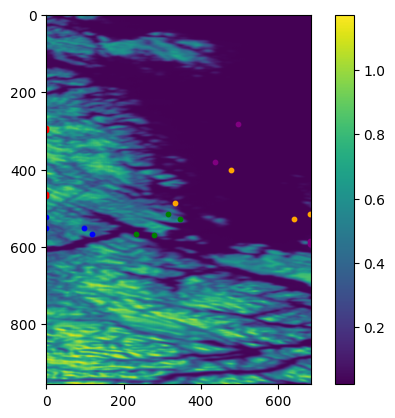

In [ ]:
plt.imshow(cube_0329[:,:,100])
plt.colorbar()

for i in range(4):
    #plt.scatter(start_end_row_col_2[i], start_end_row_piksel_2[i] , color='red', s=10)
    plt.scatter(piksel_col_A1_0329[i], piksel_row_A1_0329[i] , color='red', s=10)
    plt.scatter(piksel_col_A2_0329[i], piksel_row_A2_0329[i] , color='blue', s=10)
    plt.scatter(piksel_col_A3_0329[i], piksel_row_A3_0329[i] , color='green', s=10)
    plt.scatter(piksel_col_A5_0329[i], piksel_row_A5_0329[i] , color='orange', s=10)
    plt.scatter(piksel_col_A6_0329[i], piksel_row_A6_0329[i] , color='purple', s=10)

#### RSS forhavet 0330

In [ ]:
latitudes_0330 = satobj_h1_230330.latitudes
longitudes_0330 = satobj_h1_230330.longitudes

latitudes_0330_indirect = satobj_h1_230330.latitudes_indirect
longitudes_0330_indirect = satobj_h1_230330.longitudes_indirect

piksel_row_A1, piksel_col_A1 = f.latLong_to_piksel(target_lat_1, target_lon_1, latitudes_0330_indirect, longitudes_0330_indirect) #from file funcions_autonom.py
print(piksel_row_A1, piksel_col_A1) #sjekker at det er riktig

rss_A1 = f.hyps1_rss_matrix(cube_norm_0330, piksel_row_A1, piksel_col_A1, satobj_h1_230330) 
print(rss_A1.shape) #sjekker at det er riktig

median_A1_atmc = np.median(rss_A1, axis = 0)
median_A1_atmc.shape
normaized_spectrum_median_A1 = f.min_max_nomralization(median_A1_atmc)
l2_norm_A1 = np.linalg.norm(median_A1_atmc)  #l2 norm
l2_normalized_spectrum_A1 = median_A1_atmc / l2_norm_A1  #l2 normalisering

[np.int64(118), np.int64(198), np.int64(118), np.int64(201)] [np.int64(1091), np.int64(1091), np.int64(1091), np.int64(1091)]


NameError: name 'cube_norm_0330' is not defined

In [ ]:
piksel_row_A2, piksel_col_A2 = f.latLong_to_piksel(target_lat_2, target_lon_2, latitudes_0330_indirect, longitudes_0330_indirect) #from file funcions_autonom.py
print(piksel_row_A2, piksel_col_A2) #sjekker at det er riktig

rss_A2 = f.hyps1_rss_matrix(cube_norm_0330, piksel_row_A2, piksel_col_A2, satobj_h1_230330) 
print(rss_A2.shape) #sjekker at det er riktig

median_A2_atmc = np.median(rss_A2, axis = 0)
median_A2_atmc.shape
normaized_spectrum_median_A2 = f.min_max_nomralization(median_A1_atmc)
l2_norm_A2 = np.linalg.norm(median_A2_atmc)  #l2 norm
l2_normalized_spectrum_A2 = median_A2_atmc / l2_norm_A2  #l2 normalisering

[np.int64(216), np.int64(223), np.int64(230), np.int64(245)] [np.int64(844), np.int64(809), np.int64(1091), np.int64(1091)]
Pixel number:  722
(722, 114)


In [ ]:
latitudes_0330 = satobj_h1_230330.latitudes
longitudes_0330 = satobj_h1_230330.longitudes

latitudes_0330_indirect = satobj_h1_230330.latitudes_indirect
longitudes_0330_indirect = satobj_h1_230330.longitudes_indirect

piksel_row_A3, piksel_col_A3 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitudes_0330_indirect, longitudes_0330_indirect) #from file funcions_autonom.py
print(piksel_row_A3, piksel_col_A3) #sjekker at det er riktig

#piksel_row_A4, piksel_col_A4 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitudes_0330, longitudes_0330) #from file funcions_autonom.py
#print(piksel_row_A4, piksel_col_A4) #sjekker at det er riktig

#rss_A3 = f.hyps1_rss_matrix(cube_norm_0330, piksel_row_A3, piksel_col_A3, satobj_h1_230330) 
#print(rss_A3.shape) #sjekker at det er riktig
#
#median_A3_atmc = np.median(rss_A3, axis = 0)
#median_A3_atmc.shape
#normaized_spectrum_median_A3 = f.min_max_nomralization(median_A1_atmc)
#l2_norm_A3 = np.linalg.norm(median_A3_atmc)  #l2 norm
#l2_normalized_spectrum_A3 = median_A3_atmc / l2_norm_A3  #l2 normalisering

[np.int64(197), np.int64(204), np.int64(224), np.int64(226)] [np.int64(607), np.int64(569), np.int64(675), np.int64(623)]
[np.int64(185), np.int64(192), np.int64(215), np.int64(216)] [np.int64(447), np.int64(490), np.int64(350), np.int64(412)]


###### Her sjekker jeg mot ARias kode

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.062723308801651..2.4610562324523926].


63.8182385378043
9.531139461092963
197 607


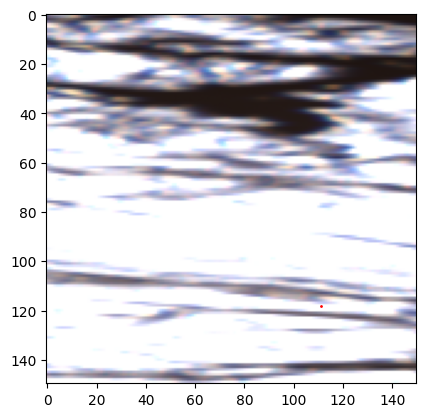

In [ ]:
# Hypso 1

#ideal_lat = 63.818490304354434 #43.558889
#ideal_lon = 9.531415429238418 #4.864167

plt.imshow(l1d_cube_230330[250:400, 400:550,[50,70,90]]*4)
plt.plot(111, 118, 'ro', markersize=1)

# calculate best lat/lon
min_error = np.inf
cropped_cube = l1d_cube_230330[250:400, 400:550,:]
for i in range(l1d_cube_230330.shape[0]):
    for j in range(l1d_cube_230330.shape[1]):
        error = np.abs( satobj_h1_230330.latitudes_indirect[ i ,j] - ideal_lat) + np.abs( satobj_h1_230330.longitudes_indirect[i,j ] - ideal_lon)
        if error < min_error:
            min_error = error
            y_point = i
            x_point = j


print(satobj_h1_230330.latitudes_indirect[ y_point,x_point])
print(satobj_h1_230330.longitudes_indirect[y_point,x_point])

print(y_point , x_point)

y_gsp_h1, x_gsp_h1 = 368 , 511

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.062723308801651..2.4610562324523926].


63.49003913829422
9.307361730891321
250 400


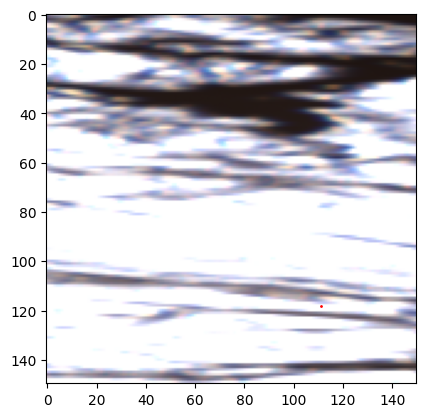

In [ ]:
# Hypso 1

#ideal_lat = 63.818490304354434 #43.558889
#ideal_lon = 9.531415429238418 #4.864167

plt.imshow(l1d_cube_230330[250:400, 400:550,[50,70,90]]*4)
plt.plot(111, 118, 'ro', markersize=1)

# calculate best lat/lon
min_error = np.inf
cropped_cube = l1d_cube_230330[250:400, 400:550,:]
for i in range(cropped_cube.shape[0]):
    for j in range(cropped_cube.shape[1]):
        error = np.abs( satobj_h1_230330.latitudes[ i + 250,j + 400] - ideal_lat) + np.abs( satobj_h1_230330.longitudes[i + 250,j + 400] - ideal_lon)
        if error < min_error:
            min_error = error
            y_point = i + 250
            x_point = j + 400


print(satobj_h1_230330.latitudes[ y_point,x_point])
print(satobj_h1_230330.longitudes[y_point,x_point])

print(y_point , x_point)

y_gsp_h1, x_gsp_h1 = 368 , 511

#### Sjekk over her

In [ ]:
piksel_row_A5, piksel_col_A5 = f.latLong_to_piksel(target_lat_5, target_lon_5, latitudes_0330_indirect, longitudes_0330_indirect) #from file funcions_autonom.py
print(piksel_row_A5, piksel_col_A5) #sjekker at det er riktig

rss_A5 = f.hyps1_rss_matrix(cube_norm_0330, piksel_row_A5, piksel_col_A5, satobj_h1_230330) 
print(rss_A5.shape) #sjekker at det er riktig

median_A5_atmc = np.median(rss_A5, axis = 0)
median_A5_atmc.shape
normaized_spectrum_median_A5 = f.min_max_nomralization(median_A1_atmc)
l2_norm_A5 = np.linalg.norm(median_A5_atmc)  #l2 norm
l2_normalized_spectrum_A5 = median_A5_atmc / l2_norm_A5  #l2 normalisering

[np.int64(139), np.int64(175), np.int64(183), np.int64(208)] [np.int64(509), np.int64(213), np.int64(602), np.int64(289)]
Pixel number:  1363
(1363, 114)


In [ ]:
piksel_row_A6, piksel_col_A6 = f.latLong_to_piksel(target_lat_6, target_lon_6, latitudes_0330_indirect, longitudes_0330_indirect) #from file funcions_autonom.py
print(piksel_row_A6, piksel_col_A6) #sjekker at det er riktig

rss_A6 = f.hyps1_rss_matrix(cube_norm_0330, piksel_row_A6, piksel_col_A6, satobj_h1_230330) 
print(rss_A6.shape) #sjekker at det er riktig

median_A6_atmc = np.median(rss_A6, axis = 0)
median_A6_atmc.shape
normaized_spectrum_median_A6 = f.min_max_nomralization(median_A1_atmc)
l2_norm_A6 = np.linalg.norm(median_A6_atmc)  #l2 norm
l2_normalized_spectrum_A6 = median_A6_atmc / l2_norm_A6  #l2 normalisering

[np.int64(78), np.int64(122), np.int64(128), np.int64(167)] [np.int64(558), np.int64(36), np.int64(556), np.int64(100)]


Pixel number:  1873
(1873, 114)


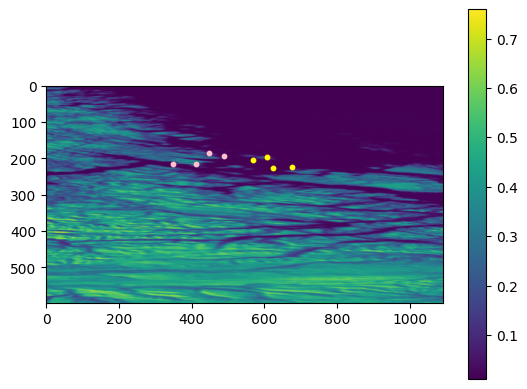

In [ ]:
#plt.imshow(cube_0330[:,:,100])
plt.imshow(l1d_cube_230330[:,:,100])
plt.colorbar()

plt.scatter(607, 197 , color='red', s=10)

for i in range(4):
    #plt.scatter(start_end_row_col_2[i], start_end_row_piksel_2[i] , color='red', s=10)
    #plt.scatter(piksel_col_A1[i], piksel_row_A1[i] , color='red', s=10)
    #plt.scatter(piksel_col_A2[i], piksel_row_A2[i] , color='blue', s=10)
    plt.scatter(piksel_col_A3[i], piksel_row_A3[i] , color='yellow', s=10)
    ##plt.scatter(piksel_col_A4[i], piksel_row_A4[i] , color='pink', s=10) #brukt for sjekk mot Arias kode 
    #plt.scatter(piksel_col_A5[i], piksel_row_A5[i] , color='orange', s=10)
    #plt.scatter(piksel_col_A6[i], piksel_row_A6[i] , color='purple', s=10)

### RSS ATM uncorected? potensielt for seinere

### RRS controll of output

#### 0316

In [ ]:
latitudes_0316 = satobj_h1.latitudes
longitudes_0316 = satobj_h1.longitudes

piksel_row_0316, piksel_col_0316 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitudes_0316, longitudes_0316) #from file funcions_autonom.py
print(piksel_row_0316, piksel_col_0316) #sjekker at det er riktig

rss_0316 = f.hyps1_rss_matrix(cube_norm_0316, piksel_row_0316, piksel_col_0316, satobj_h1) 
print(rss_0316.shape) #sjekker at det er riktig

median_0316_atmc = np.median(rss_0316, axis=0)

normaized_spectrum_median_0316 = f.min_max_nomralization(median_0316_atmc)

l2_norm_0316 = np.linalg.norm(median_0316_atmc)  #l2 norm
l2_normalized_spectrum_0316 = median_0316_atmc / l2_norm_0316  #l2 normalisering

[np.int64(530), np.int64(544), np.int64(583), np.int64(586)] [np.int64(339), np.int64(369), np.int64(253), np.int64(300)]
Pixel number:  607
(607, 114)


#### 0328

In [ ]:
latitudes_0328 = satobj_h1_0328.latitudes
longitudes_0328 = satobj_h1_0328.longitudes

piksel_row_0328, piksel_col_0328 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitudes_0328, longitudes_0328) #from file funcions_autonom.py
print(piksel_row_0328, piksel_col_0328) #sjekker at det er riktig

rss_0328 = f.hyps1_rss_matrix(cube_norm_0328, piksel_row_0328, piksel_col_0328, satobj_h1_0328) 
print(rss_0328.shape) #sjekker at det er riktig

median_0328_atmc = np.median(rss_0328, axis=0)

normaized_spectrum_median_0328 = f.min_max_nomralization(median_0328_atmc)

l2_norm_0328 = np.linalg.norm(median_0328_atmc)  #l2 norm
l2_normalized_spectrum_0328 = median_0328_atmc / l2_norm_0328  #l2 normalisering

[np.int64(534), np.int64(548), np.int64(586), np.int64(589)] [np.int64(364), np.int64(384), np.int64(297), np.int64(330)]
Pixel number:  604
(604, 114)


#### 0329

In [ ]:
latitudes_0329 = satobj_h1_0329.latitudes
longitudes_0329 = satobj_h1_0329.longitudes

piksel_row_0329, piksel_col_0329 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitudes_0329, longitudes_0329) #from file funcions_autonom.py
print(piksel_row_0329, piksel_col_0329) #sjekker at det er riktig

rss_0329 = f.hyps1_rss_matrix(cube_norm_0329, piksel_row_0329, piksel_col_0329, satobj_h1_0329) 
print(rss_0329.shape) #sjekker at det er riktig

rss_u_0329 = f.water_masked_rss_matrix(piksel_row_0329, piksel_col_0329, l1d_cube_0329, satobj_h1_0329)
print(rss_u_0329.shape)

median_0329_atmc = np.median(rss_0329, axis=0)
median_0329_u = np.median(rss_0329, axis = 1)

normaized_spectrum_median_0329 = f.min_max_nomralization(median_0329_atmc)

l2_norm_0329 = np.linalg.norm(median_0329_atmc)  #l2 norm
l2_normalized_spectrum_0329 = median_0329_atmc / l2_norm_0329  #l2 normalisering

[np.int64(515), np.int64(528), np.int64(568), np.int64(570)] [np.int64(316), np.int64(346), np.int64(232), np.int64(279)]


Pixel number:  582
(582, 114)
Pixel number:  1407
(110, 1407)


#### 0330

In [ ]:
latitudes_0330 = satobj_h1_230330.latitudes
longitudes_0330 = satobj_h1_230330.longitudes

piksel_row_0330, piksel_col_0330 = f.latLong_to_piksel(target_lat_3, target_lon_3, latitudes_0330, longitudes_0330) #from file funcions_autonom.py

print(piksel_row_0330, piksel_col_0330) #sjekker at det er riktig

rss_0330 = f.hyps1_rss_matrix(cube_norm_0330, piksel_row_0330, piksel_col_0330, satobj_h1_230330) 
print(rss_0330.shape) #sjekker at det er riktig

median_0330_atmc = np.median(rss_0330, axis=0)
median_0330_atmc.shape

normaized_spectrum_median_0330 = f.min_max_nomralization(median_0330_atmc)

l2_norm_0330 = np.linalg.norm(median_0330_atmc)  #l2 norm
l2_normalized_spectrum_0330 = median_0330_atmc / l2_norm_0330  #l2 normalisering

[np.int64(185), np.int64(192), np.int64(215), np.int64(216)] [np.int64(447), np.int64(490), np.int64(350), np.int64(412)]
Pixel number:  519
(519, 114)


### Plots

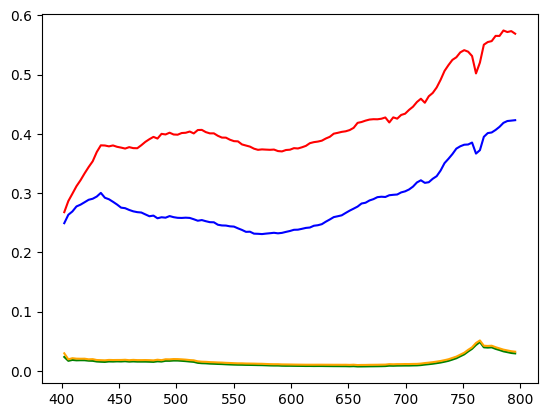

In [ ]:
#plt.plot(wl, median_A1_0316_atmc, color='black', label='median A1')
#plt.plot(wl, median_A2_0316_atmc, color='red', label='median A2')
#plt.plot(wl, median_A3_0316_atmc, color='blue', label='median A3')
#plt.plot(wl, median_A5_0316_atmc, color='green', label='median A5')
#plt.plot(wl, median_A6_0316_atmc, color='orange', label='median A6')
#
#plt.plot(wl, median_A1_0328_atmc, color='black', label='median A1')
#plt.plot(wl, median_A2_0328_atmc, color='red', label='median A2')
#plt.plot(wl, median_A3_0328_atmc, color='blue', label='median A3')
#plt.plot(wl, median_A5_0328_atmc, color='green', label='median A5')
#plt.plot(wl, median_A6_0328_atmc, color='orange', label='median A6')
#
##plt.plot(wl, median_A1_0329_atmc, color='black', label='median A1')
#plt.plot(wl, median_A2_0329_atmc, color='red', label='median A2')
#plt.plot(wl, median_A3_0329_atmc, color='blue', label='median A3')
#plt.plot(wl, median_A5_0329_atmc, color='green', label='median A5')
#plt.plot(wl, median_A6_0329_atmc, color='orange', label='median A6')
#
plt.plot(wl, median_A1_atmc, color='black', label='median A1')  ### 0330
plt.plot(wl, median_A2_atmc, color='red', label='median A2')
plt.plot(wl, median_A3_atmc, color='blue', label='median A3')
plt.plot(wl, median_A5_atmc, color='green', label='median A5')
plt.plot(wl, median_A6_atmc, color='orange', label='median A6')
